In [153]:
### load library 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# missing data vis 
import missingno


## Plotint setting 
%matplotlib inline
sns.set(style="white",palette= "muted")
sns.set_context("talk", font_scale=0.9)#, rc={"lines.linewidth": 1})


### for ttest 

from scipy.stats import ttest_ind

In [2]:
test = pd.read_csv("./test_table.csv")
user = pd.read_csv("./user_table.csv")

In [4]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [6]:
test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [8]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [9]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [10]:
## join two table 

df = pd.merge(left = test,right =user,how = "left",on = "user_id")

In [35]:
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   date              453321 non-null  object 
 2   source            453321 non-null  object 
 3   device            453321 non-null  object 
 4   browser_language  453321 non-null  object 
 5   ads_channel       181877 non-null  object 
 6   browser           453321 non-null  object 
 7   conversion        453321 non-null  int64  
 8   test              453321 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB



Preview of data with null values:
xxxxxxxxxxxxx
   user_id        date  source  device browser_language ads_channel  \
0   315281  2015-12-03  Direct     Web               ES         NaN   
5   540675  2015-12-03  Direct  Mobile               ES         NaN   
6   863394  2015-12-04     SEO  Mobile            Other         NaN   

       browser  conversion  test sex   age    country  
0           IE           1     0   M  32.0      Spain  
5  Android_App           0     1   F  22.0  Venezuela  
6  Android_App           0     0   M  35.0     Mexico  


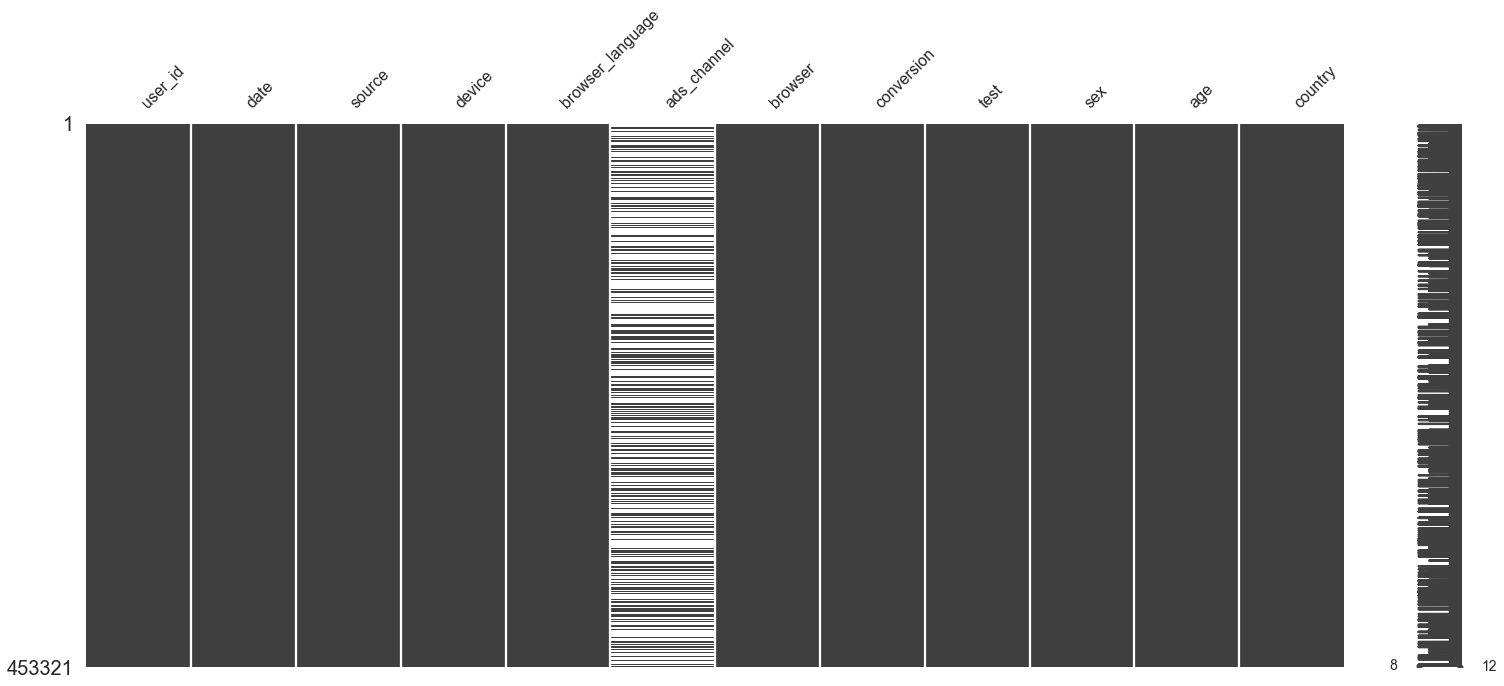

In [23]:
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix((df))
    plt.show()

In [15]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [95]:
for column in df.columns:
    top_freq = list(df[column].value_counts().index)
    print('{0:20s} {1:5d}\t'.format(column, len(top_freq)), top_freq[:5])

user_id              453321	 [2047, 83074, 406636, 402542, 449649]
date                     5	 ['2015-12-04', '2015-12-03', '2015-11-30', '2015-12-01', '2015-12-02']
source                   3	 ['Ads', 'SEO', 'Direct']
device                   2	 ['Web', 'Mobile']
browser_language         3	 ['ES', 'EN', 'Other']
ads_channel              5	 ['Facebook', 'Google', 'Yahoo', 'Bing', 'Other']
browser                  7	 ['Android_App', 'Chrome', 'IE', 'Iphone_App', 'Safari']
conversion               2	 [0, 1]
test                     2	 [0, 1]
sex                      2	 ['M', 'F']
age                     52	 [21.0, 22.0, 23.0, 20.0, 24.0]
country                 17	 ['Mexico', 'Colombia', 'Spain', 'Argentina', 'Peru']


In [26]:
#### 
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


## EDA 

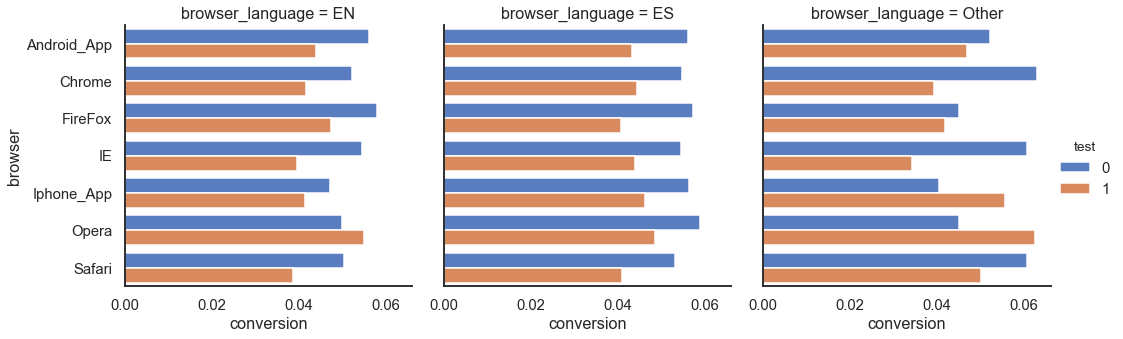

In [114]:
## it appear that at each language the old version conver higher rate
df_mean = df.groupby(['test','browser_language','browser']).mean().reset_index()
df_mean
ax = sns.catplot(y="browser", x="conversion",
            col = 'browser_language', hue="test", data=df_mean, kind="bar",height=5,aspect=1)


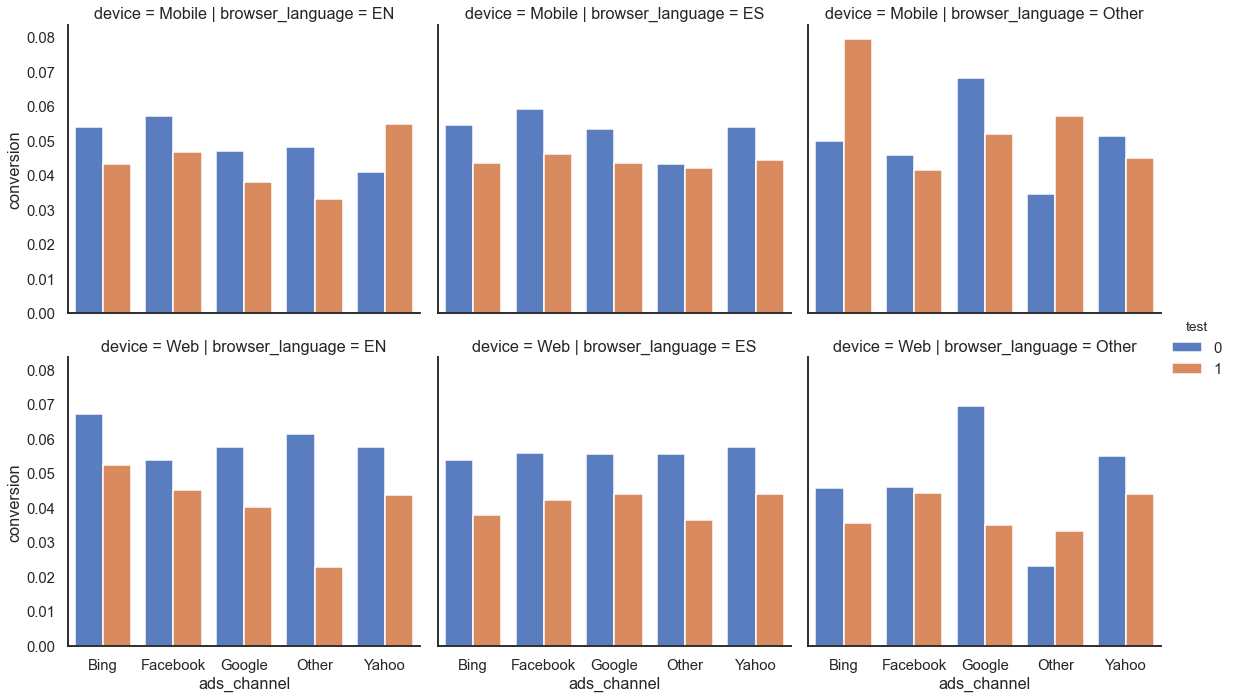

In [103]:
## it appear that at each language the old version conver higher rate
df_mean = df.groupby(['test','ads_channel','device','browser_language']).mean().reset_index()
df_mean
sns.catplot(x="ads_channel", y="conversion",row = 'device',col = 'browser_language', hue="test", data=df_mean, kind="bar",height=5,aspect=1.1)

### only five days time might too short ? 

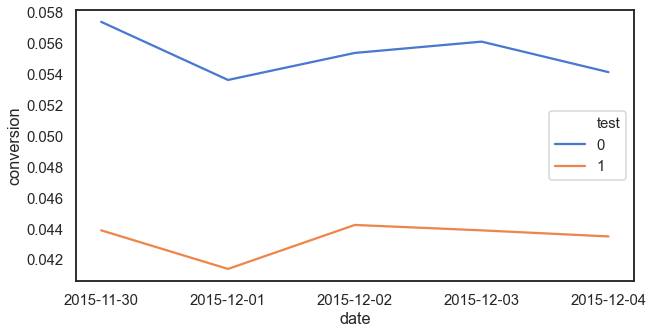

In [127]:

df['date'].value_counts().index

df_date = df.groupby(['date','test']).mean().reset_index()
plt.figure(figsize= (10,5))
sns.lineplot(x = 'date',y = 'conversion',hue = 'test',data = df_date)


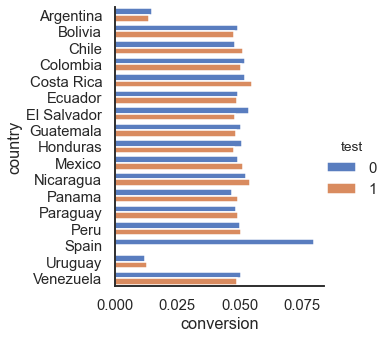

In [146]:
df_coun = df.groupby(['country','test']).mean().reset_index()

sns.catplot(data = df_coun,x = 'conversion', hue = 'test', y = 'country',kind = 'bar')

In [152]:
df.groupby(['country']).mean().reset_index()

,country,user_id,conversion,test,age
0,Argentina,499067.041555,0.013994,0.799799,27.131064
1,Bolivia,498211.608504,0.048634,0.501079,27.096908
2,Chile,501589.603841,0.049704,0.500785,27.210569
3,Colombia,499124.463245,0.051332,0.498927,27.142693
4,Costa Rica,497073.445658,0.053494,0.498964,27.148427
5,Ecuador,498994.322995,0.049072,0.494432,27.037496
6,El Salvador,498102.368930,0.050765,0.497492,27.102875
7,Guatemala,500720.166876,0.049653,0.496066,27.167868
8,Honduras,498768.932190,0.049253,0.491013,27.142857
9,Mexico,500617.230356,0.050341,0.500257,27.118209


In [148]:
df_coun.sort_values(['country','conversion'])

,country,test,user_id,conversion,age
1,Argentina,1,499662.469888,0.013725,27.132782
0,Argentina,0,496688.319367,0.015071,27.124198
3,Bolivia,1,499866.009508,0.047901,26.997309
2,Bolivia,0,496550.053333,0.049369,27.196937
4,Chile,0,505092.208566,0.048107,27.188268
5,Chile,1,498097.984622,0.051295,27.232800
7,Colombia,1,498809.285926,0.050571,27.106777
6,Colombia,0,499438.290867,0.052089,27.178455
8,Costa Rica,0,496111.016165,0.052256,27.222556
9,Costa Rica,1,498039.871650,0.054738,27.073990


### Clearly  there is some sampling bias in Argentina & Spain, Uruguay

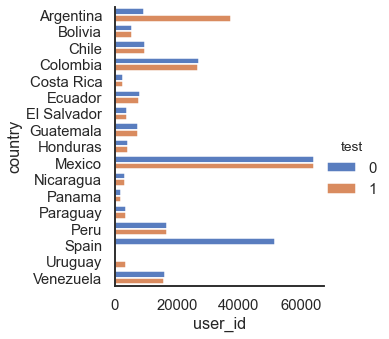

In [145]:
df_coun = df.groupby(['country','test']).count().reset_index()
df_coun
sns.catplot(data = df_coun,x = 'user_id', hue = 'test', y = 'country',kind = 'bar')

In [150]:
df.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [151]:
df.describe(include= ['object'])

,date,source,device,browser_language,ads_channel,browser,sex,country
count,453321,453321,453321,453321,181877,453321,452867,452867
unique,5,3,2,3,5,7,2,17
top,2015-12-04,Ads,Web,ES,Facebook,Android_App,M,Mexico
freq,141163,181877,251565,377547,68425,155135,264485,128484


In [136]:
## We notice here that , the uneven sample size between control and treatment
df.groupby(['test']).count()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,sex,age,country
test,,,,,,,,,,,
0,237338,237338,237338,237338,237338,95348,237338,237338,237093,237093,237093
1,215983,215983,215983,215983,215983,86529,215983,215983,215774,215774,215774


In [160]:
ttest_ind(0.04790096878363832,0.04897830870795347, equal_var=False)

C:\Users\jpouu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\jpouu\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jpouu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\jpouu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\jpouu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_indResult(statistic=nan, pvalue=nan)

In [157]:
data = df

In [159]:
countries = [name for name in data['country'].unique() if name is not np.nan]

print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'P-Value'))
print('-' * 65)
for country in countries:
    test_val = data[(data['country'] == country) & (data['test'] == 1)]['conversion'].values
    cont_val = data[(data['country'] == country) & (data['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    
    print(test_mean)
    p_val = ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(country, test_mean, cont_mean, p_val))

Country               Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
nan
Spain                       nan         0.07972        nan
0.05118630882924932
Mexico                  0.05119         0.04949   0.165544


C:\Users\jpouu\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice.
  if __name__ == '__main__':
C:\Users\jpouu\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.04897830870795347
Venezuela               0.04898         0.05034   0.573702
0.04790096878363832
Bolivia                 0.04790         0.04937   0.718885
0.05057096247960848
Colombia                0.05057         0.05209   0.423719
0.012906695348211886
Uruguay                 0.01291         0.01205   0.879764
0.04794688959921318
El Salvador             0.04795         0.05355   0.248127
0.05417675544794189
Nicaragua               0.05418         0.05265   0.780400
0.05060427457284039
Peru                    0.05060         0.04991   0.771953
0.05473763684409211
Costa Rica              0.05474         0.05226   0.687876
0.051295022258195065
Chile                   0.05130         0.04811   0.302848
0.013725018059234288
Argentina               0.01373         0.01507   0.335147
0.04898842091869195
Ecuador                 0.04899         0.04915   0.961512
0.04864720778355325
Guatemala               0.04865         0.05064   0.572107
0.04753981459472308
Honduras                0.047